In [1]:
import wrds
import pandas as pd
from datetime import datetime

In [2]:
db = wrds.Connection()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
Loading library list...
Done


In [3]:
constituents = db.get_table("comp_na_daily_all", "idxcst_his").set_index("gvkey")
security = db.get_table("comp_na_daily_all", "security").set_index("gvkey")

In [4]:
data = constituents.join(security[["tic", "cusip", "dldtei"]])
data = data[data["gvkeyx"] == "000208"].reset_index() # 208=Nasdaq 100

In [5]:
dates = pd.date_range(data["from"].min(), datetime.today())

In [6]:
components = pd.DataFrame(index=dates, columns=data["gvkey"].unique())

In [7]:
for i in data.index:
    components.loc[data.loc[i, "from"]:data.loc[i, "thru"], data.loc[i, "gvkey"]] = True
components = components.asfreq("BM", how="last").dropna(axis=1, how='all')
components = components.reindex(dates, method='pad').dropna(axis=1, how='all').dropna(how='all')

In [8]:
gvkeys = ", ".join([f"'{x}'" for x in components.columns])

In [9]:
sql = f"select gvkey, datadate, tic, prccd, prchd, prcod, ajexdi, trfd  from comp.secd where gvkey in ({gvkeys}) and datadate >= '1995-01-31'"

In [10]:
prices = db.raw_sql(sql)

In [10]:
import pickle

In [11]:
cpd = pd.read_csv("data/wrds_cpd_21lbw/001045.csv")
prices = pickle.load(open("data/prices.p", "rb"))

In [12]:
aal = prices[prices["tic"] == "AAL"]
aal = aal.set_index("datadate")["adjclose"]

<AxesSubplot:xlabel='datadate'>

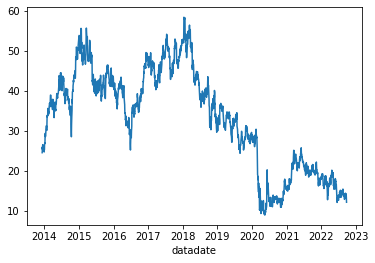

In [13]:
aal.plot()

In [21]:
aal.index = pd.to_datetime(aal.index)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
sub = aal.loc["2020-03-01": "2020-03-30"]

In [57]:
sub2 = aal.loc["2020-03-03": "2020-03-31"]

In [64]:
sub3 = aal.loc["2020-03-06": "2020-04-03"]

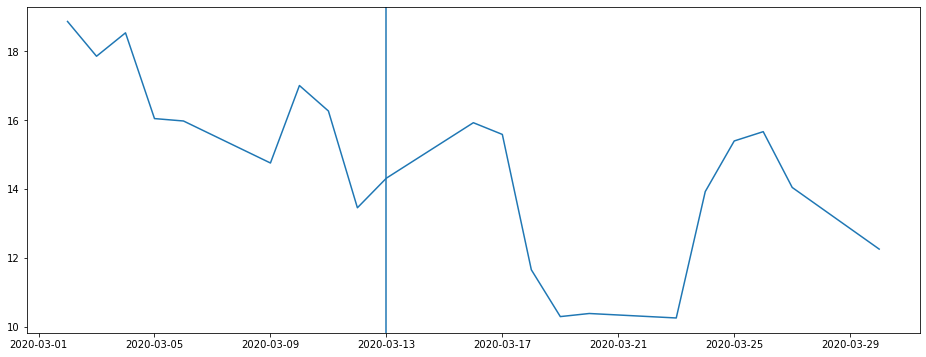

In [54]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(sub.index, sub.values)
ax.axvline(cpd.index[int(cpd.loc["2020-03-30", "cp_location"])-21])
plt.show()

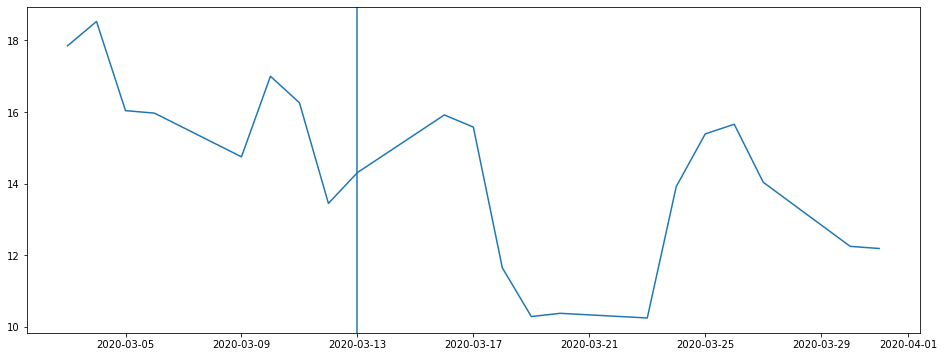

In [58]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(sub2.index, sub2.values)
ax.axvline(cpd.index[int(cpd.loc["2020-03-31", "cp_location"])-21])
plt.show()

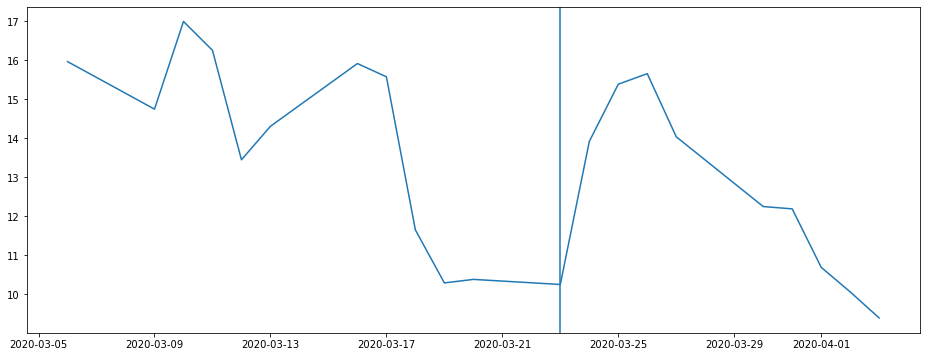

In [65]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(sub3.index, sub3.values)
ax.axvline(cpd.index[int(cpd.loc["2020-04-03", "cp_location"]) - 21])
plt.show()

In [40]:
cpd.loc["2020-03-30"]

t                   9542.000000
cp_location         9531.001059
cp_location_norm       0.523759
cp_score               0.894833
Name: 2020-03-30 00:00:00, dtype: float64

In [48]:
cpd.index[int(cpd.loc["2020-03-30", "cp_location"])-21]

Timestamp('2020-03-13 00:00:00')

<AxesSubplot:xlabel='date'>

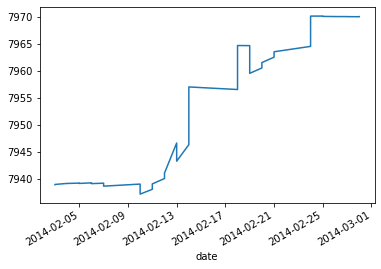

In [73]:
cpd.loc["2014-02", "cp_location"].plot()

In [74]:
constituents = pickle.load(open("data/constituents.p", "rb"))

,001013,001045,001055,001111,001161,001164,001254,001300,001327,001440,...,180405,180652,180711,183377,184725,184996,199356,205692,211009,212340
1995-01-31,True,NaN,True,NaN,NaN,True,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-01,True,NaN,True,NaN,NaN,True,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-02,True,NaN,True,NaN,NaN,True,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-03,True,NaN,True,NaN,NaN,True,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-04,True,NaN,True,NaN,NaN,True,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,True,...,True,True,True,True,True,True,NaN,NaN,NaN,NaN
2022-09-24,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,True,...,True,True,True,True,True,True,NaN,NaN,NaN,NaN
2022-09-25,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,True,...,True,True,True,True,True,True,NaN,NaN,NaN,NaN
2022-09-26,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,True,...,True,True,True,True,True,True,NaN,NaN,NaN,NaN


In [42]:
import numpy as np

In [38]:
cpd.loc["2020-03-30"]

t                   9542.000000
cp_location         9531.001059
cp_location_norm       0.523759
cp_score               0.894833
Name: 2020-03-30 00:00:00, dtype: float64

In [17]:
cpd.set_index("date")

,t,cp_location,cp_location_norm,cp_score
date,,,,
1995-03-02,21,1.650612e-307,1.000000,NaN
1995-03-03,22,1.297412e+01,0.429804,0.604623
1995-03-06,23,8.960188e+00,0.668562,0.850957
1995-03-07,24,8.933553e+00,0.717450,0.888990
1995-03-08,25,8.522453e+00,0.784645,0.951162
...,...,...,...,...
2022-09-09,10159,1.014684e+04,0.579092,0.659122
2022-09-12,10160,1.014947e+04,0.501415,0.877377
2022-09-13,10161,1.015514e+04,0.278846,0.755251


tic
AAL     2022-09-23
AALCP   2014-04-08
AAMRQ   2013-12-06
AAR     2012-01-04
Name: datadate, dtype: datetime64[ns]

In [75]:
aal.reset_index()

,gvkey,tic,prccd,prchd,prcod,ajexdi,trfd,adjclose
datadate,,,,,,,,
1995-01-31,001045,AAMRQ,56.125,57.375,NaN,2.0,1.000000,28.0625
1995-02-01,001045,AAMRQ,56.750,57.500,NaN,2.0,1.000000,28.3750
1995-02-02,001045,AAMRQ,56.500,57.375,NaN,2.0,1.000000,28.2500
1995-02-03,001045,AAMRQ,58.000,58.500,NaN,2.0,1.000000,29.0000
1995-02-06,001045,AAMRQ,57.250,58.000,NaN,2.0,1.000000,28.6250
...,...,...,...,...,...,...,...,...
2014-04-02,001045,AALCP,28.450,29.200,29.20,1.0,1.060905,28.4500
2014-04-03,001045,AALCP,28.130,28.700,28.70,1.0,1.060905,28.1300
2014-04-04,001045,AALCP,27.590,28.490,28.24,1.0,1.060905,27.5900


In [74]:
aal.tic.unique()

array(['AAMRQ', 'AAR', 'AAL', 'AALCP'], dtype=object)

In [53]:
from data.pull_data import pull_wrds_sample_data

In [54]:
data = pull_wrds_sample_data("001045", prices, "gvkey")

In [69]:
data

,close
date,
1995-01-31,28.0625
1995-02-01,28.3750
1995-02-02,28.2500
1995-02-03,29.0000
1995-02-06,28.6250
...,...
2014-04-02,28.4500
2014-04-03,28.1300
2014-04-04,27.5900


In [68]:
data.loc["2008-01-06"]

KeyError: '2008-01-06'

In [50]:
import numpy as np

In [ ]:
import data.download_yf_data as yf_download
from data.pull_data import pull_yfinance_sample_data
from mom_trans.data_prep import deep_momentum_strategy_features

%load_ext autoreload
%autoreload 2

In [ ]:
# yf_download.main(index_symbol="NDX")

In [ ]:
deep_momentum_strategy_features(pull_yfinance_sample_data("AAPL"))